In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("accenture salary.csv")
dataset

,Position,Grade,Salary
0,New Associate,1,17000
1,Associate,2,27000
2,Analyst,3,40000
3,Senior Analyst,4,65000
4,Team Lead,5,100000
5,Associate Manager,6,150000
6,Manager,7,250000
7,Senior Manager,8,400000
8,Leadership,9,650000
9,Senior Leadership,10,1000000


In [5]:
X= dataset.iloc[: , 1:-1].values
y = dataset.iloc[: , -1].values

In [6]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [12]
 [13]]


In [7]:
print(y)

[  17000   27000   40000   65000  100000  150000  250000  400000  650000
 1000000 1800000 4000000]


In [8]:
y = y.reshape(len(y) ,1)

In [9]:
print(y)

[[  17000]
 [  27000]
 [  40000]
 [  65000]
 [ 100000]
 [ 150000]
 [ 250000]
 [ 400000]
 [ 650000]
 [1000000]
 [1800000]
 [4000000]]


In [12]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [28]:
print(X)

[[-1.52973232]
 [-1.25977956]
 [-0.9898268 ]
 [-0.71987403]
 [-0.44992127]
 [-0.17996851]
 [ 0.08998425]
 [ 0.35993702]
 [ 0.62988978]
 [ 0.89984254]
 [ 1.43974807]
 [ 1.70970083]]


In [29]:
from sklearn.svm import SVR 
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

c:\users\yash\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [35]:
a=regressor.predict(sc_X.transform([[6.5]]))
a

array([-0.36788056])

In [36]:
sc_y.inverse_transform([a])

array([[298252.57347613]])

ValueError: Found array with dim 3. None expected <= 2.

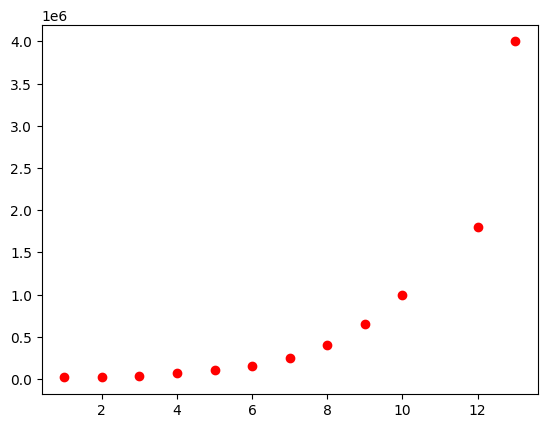

In [42]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform([X]),sc_y.inverse_transform([[a]]),  color = 'blue')
plt.title('(SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()